# **Laboratorium ADOM 2 - ZALICZENIE**
---


**Napisz funkcję realizującą rozciąganie histogramu z różnymi sposobami wyznaczania wartości *min*, *max*.** W szczególności funkcja powinna realizować następujące zadania:

- wczytywać obraz wejściowy, wariant operacji i niezbędne parametry
- wyznaczać obraz z rozciągniętym histogramem dla obrazu w skali szarości

Funkcja powinna implementować następujące warianty wyznaczania wartości *min* i *max*:

1. wartości min, max zadane przez użytkownika w skali 0...1
2. wartości obliczone automatycznie jako najmniejsza (*min*) i największa (*max*) wartość piksela obrazu
3. wartości obliczone automatycznie jako najmniejsza (*min*) oraz największa (*max*) taka jasność *p* dla której wartość histogramu histogramu *h(p)* jest większa od zadanego progu *t*
4. wartości obliczone automatycznie jako: *min* - najmniejsza taka jasność *p* dla której wartość histogramu skumulowanego *hs(p)* jest większa od zadanego progu *t*; *max* - jako największa taka jasność *p* dla której wartość histogramu skumulowanego *hs(p)* jest mniejsza od progu *(liczba_piks - t)* gdzie *liczba_piks jest* całkowitą liczbą pikseli w obrazie.  

W poniższych oknach należy wpisać:

1. swoje imię, nazwisko, numer indeksu i datę
2. kod funkcji
3. kod demonstaracyjny pokazujący wywołanie funkcji dla czterach wariantów wyznaczania wartości *min* i *max*

Nazwę pliku należy zmienić na `ADOM2zal_Imię_Nazwisko.ipynb`, a wynikowy plik wgrać w miejsce wskazane przez prowadzącego, nie przekraczając ustalonego terminu.


---
Dane studenta:
- nr indeksu: 279086
- imię: Michał 
- nazwisko: Bogacz
- data: 06.11.2020
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# data import
location = './ADOM/dowels.png'
image = cv2.imread(location, 0)
#2.cvtColor(cv2.imread(location), cv2.COLOR_BGR2RGB)

# kod funkcji pomocniczych 
# funkcja wyswietlająca obraz kolorowy (openCV, bgr) lub w skali szarości
def pokaz(obraz,tytul=""):
    if obraz.ndim == 2:
        plt.imshow(obraz,cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(obraz,cv2.COLOR_BGR2RGB))
    plt.title(tytul) 

In [4]:
# kod funkcji rozciągania histogramu
def histogram_manipulation(image, version, basic_param = None, treshold = None):
    '''Takes in:
        image - numpy array representation of image
        version:   
            - basic - min, max set manually between (0,1)
            - auto_value - min, max based on values of min/max pixel values
            - auto_brightness - based on min/max values od brightness on histogram, greater than treshold t
            - auto_brightness_cumulative - similiar to upper mentiond byt usin cumulative histogram
        basic_param - tuple of values min and max for LUT matrix
        treshold - used in automated methods
            - auto_brightness - the minimal number of pixels in min/max brightenes
        '''
    # deklaracja tabeli LUT
    lut = np.empty((1,256), np.uint8) 
    # BASIC
    if version == 'basic':
        if basic_param == None: raise Exception('No basic_param was given')
        (wmin, wmax) = basic_param
        wmin = int(wmin*255)
        wmax = int(wmax*255)
    # AUTO_VALUE
    elif version == 'auto_value':
        wmin = np.min(image)
        wmax = np.max(image)
    # AUTO_BRIGHTNESS   
    elif version == 'auto_brightness':
        histr = cv2.calcHist([image], [0], None, [256], [0,256])
        if np.max(histr)<treshold: 
            raise Exception('Treshold is to big, max acceptable treshold: {}'.format(np.max(histr)))
        # min
        for brightness,i in enumerate(histr):
            if i >= treshold:
                wmin = brightness
                break
        # max        
        for brightness,i in enumerate(histr[::-1]):
            if i >= treshold:
                wmax = 256 - brightness
                break
    # AUTO_BRIGHTNESS_CUMULATIVE
    elif version == 'auto_brightness_cumulative':
        histr = cv2.calcHist([image], [0], None, [256], [0,256])
        histr = np.cumsum(histr)
        n_pixels = image.shape[0]*image.shape[1]
        print(n_pixels)
        # zabezpiecznie przed dzieleniem przez 0
        if np.ceil(n_pixels/2)<=treshold: 
            raise Exception('Treshold is to big, max acceptable treshold: {}'.format(np.ceil(n_pixels/2)))
        # min
        for brightness,i in enumerate(histr):
            if i >= treshold:
                wmin = brightness
                break
        # max 
        for brightness,i in enumerate(histr):
            if i >= (n_pixels - treshold):
                wmax = brightness
                break         
        if wmax == wmin:
            wmax = wmin + 1
    # BLEDNE PODANIE TRYPU PRACY
    else:
        raise Exception('The version value should be one of given in doc. The value was: {}'.format(version))
    
    # wyliczneie LUT
    for i in range(256):
        if i<wmin:
            lut[0,i] = 0
        elif i>wmax:
            lut[0,i] = 255
        else:
            lut[0,i] = int(float((i - wmin)*255)/float(wmax - wmin))
    # zastosowanie wyliczonego LUT dla obrazu       
    output_img = cv2.LUT(image,lut)
    print('(wmin,wmax) = ({},{})'.format(wmin, wmax))
    
    plt.figure(figsize=(15,5), dpi= 80)
    plt.subplot(1,3,1)
    pokaz(image)
    plt.subplot(1,3,2)
    plt.plot(lut[0,:], color = 'b' )
    plt.xlim([0,256])
    plt.ylim([0,256])
    plt.subplot(1,3,3)
    pokaz(output_img)
        

(wmin,wmax) = (51,204)


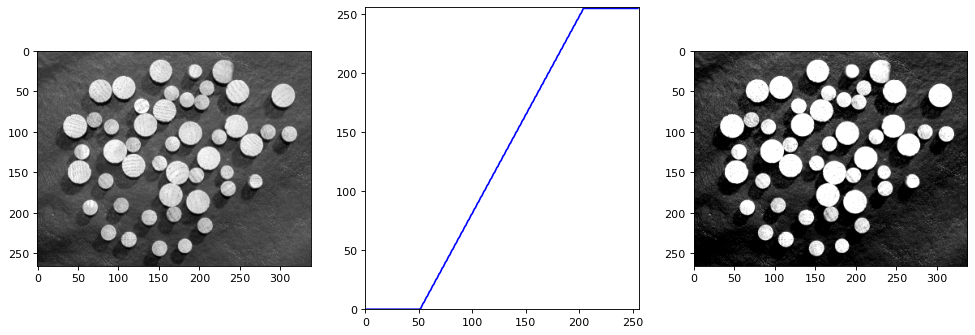

In [5]:
# kod demonstacyjny (wariant 1)

histogram_manipulation(image, version = 'basic', basic_param = (0.2, 0.8))

(wmin,wmax) = (0,255)


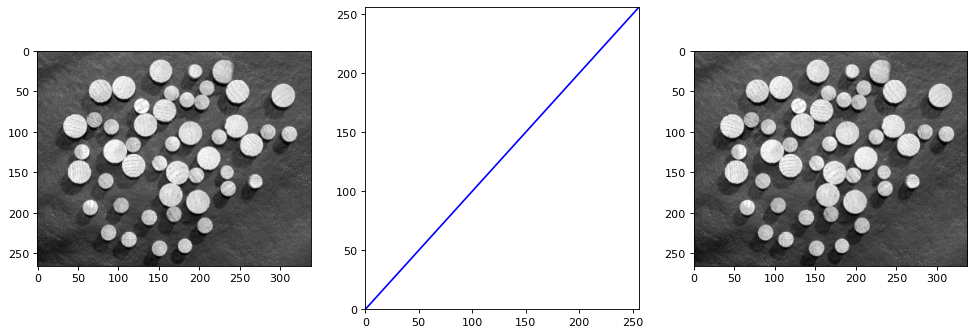

In [503]:
# kod demonstacyjny (wariant 2)
histogram_manipulation(image, version = 'auto_value')

(wmin,wmax) = (66,80)


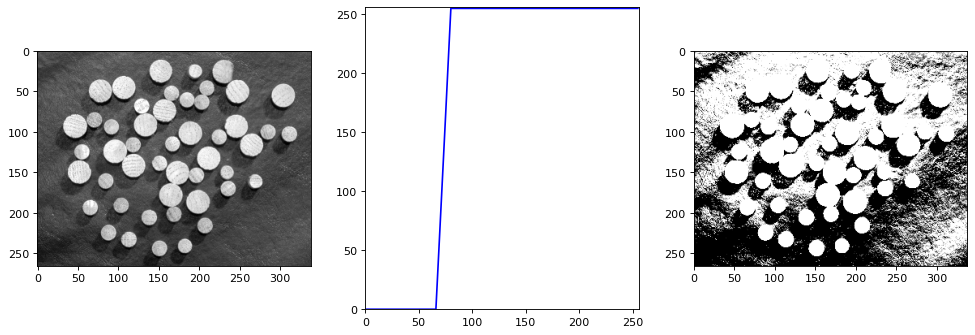

In [504]:
# kod demonstacyjny (wariant 3)
histogram_manipulation(image, version = 'auto_brightness', treshold=2100)

89908
(wmin,wmax) = (36,230)


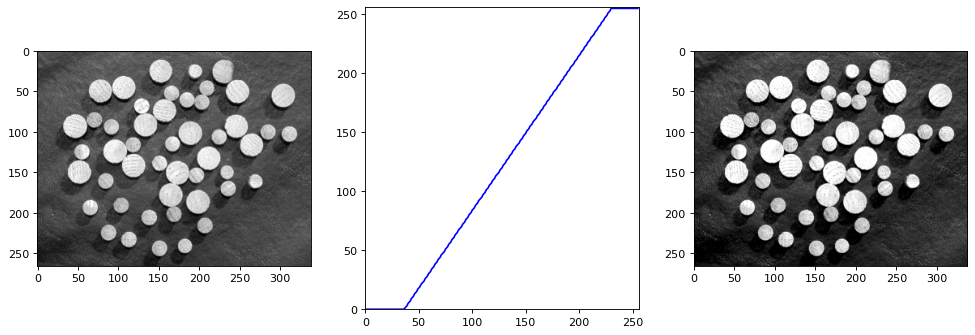

In [508]:
# kod demonstacyjny (wariant 4)
histogram_manipulation(image, version = 'auto_brightness_cumulative', treshold=4000)